In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

plt.style.use('fast')

%matplotlib inline
sns.set_style('darkgrid')

# Объединение по индексу через INNER

In [3]:
df1 = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/MyKOMPOSIT/X_bp.xlsx', index_col = 0)
df2 = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/MyKOMPOSIT/X_nup.xlsx', index_col = 0)
df1.join(df2, how = 'inner')

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000,0,4.000000,57.000000
1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0,4.000000,60.000000
2,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000,0,4.000000,70.000000
3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0,5.000000,47.000000
4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.000000,57.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,90,9.076380,47.019770
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,90,10.565614,53.750790
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,90,4.161154,67.629684
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,90,6.313201,58.261074


In [4]:
df = df1.join(df2, how = 'inner')
df.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0,0,4.0,57.0
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,70.0
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,57.0


# Проверка на наличие пропусков

In [5]:
df.isna().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

<Axes: >

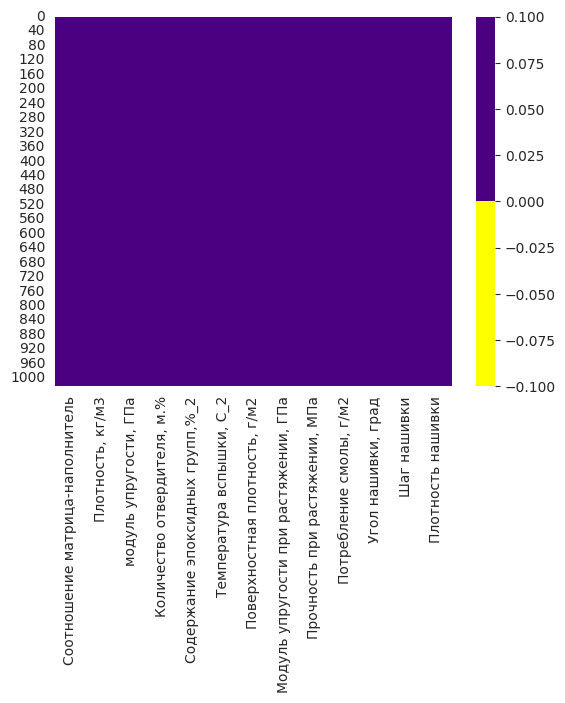

In [6]:
cols = df # Тепловая карта пропущенных значений (указаны желтым)
colours = ['#FFFF00', '#4B0082'] 
sns.heatmap(df.isnull(), cmap=sns.color_palette(colours))

Пропуски отстутствуют

# Описательная статистика

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Соотношение матрица-наполнитель,1023.0,2.930366,0.913222,0.389403,2.317887,2.906878,3.552660,5.591742
"Плотность, кг/м3",1023.0,1975.734888,73.729231,1731.764635,1924.155467,1977.621657,2021.374375,2207.773481
"модуль упругости, ГПа",1023.0,739.923233,330.231581,2.436909,500.047452,739.664328,961.812526,1911.536477
"Количество отвердителя, м.%",1023.0,110.570769,28.295911,17.740275,92.443497,110.564840,129.730366,198.953207
"Содержание эпоксидных групп,%_2",1023.0,22.244390,2.406301,14.254985,20.608034,22.230744,23.961934,33.000000
"Температура вспышки, С_2",1023.0,285.882151,40.943260,100.000000,259.066528,285.896812,313.002106,413.273418
"Поверхностная плотность, г/м2",1023.0,482.731833,281.314690,0.603740,266.816645,451.864365,693.225017,1399.542362
"Модуль упругости при растяжении, ГПа",1023.0,73.328571,3.118983,64.054061,71.245018,73.268805,75.356612,82.682051
"Прочность при растяжении, МПа",1023.0,2466.922843,485.628006,1036.856605,2135.850448,2459.524526,2767.193119,3848.436732
"Потребление смолы, г/м2",1023.0,218.423144,59.735931,33.803026,179.627520,219.198882,257.481724,414.590628


Из данных таблицы мы можем посмотреть следующие значения для каждого признака:

count - количество значений
mean - среднее значение
std - стандартное отклонение
min - минимум
25% - верхнее значение первого квартиля
50% - медиана
75% - верхнее значение третьего квартиля
max - максимум





# Гистограммы распределения до нормализации

In [8]:
def plot_hist(x, title="", xlabel=""):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Количество")
    plt.hist(x, bins = 15)
    plt.show()

array([[<Axes: title={'center': 'Соотношение матрица-наполнитель'}>,
        <Axes: title={'center': 'Плотность, кг/м3'}>,
        <Axes: title={'center': 'модуль упругости, ГПа'}>,
        <Axes: title={'center': 'Количество отвердителя, м.%'}>],
       [<Axes: title={'center': 'Содержание эпоксидных групп,%_2'}>,
        <Axes: title={'center': 'Температура вспышки, С_2'}>,
        <Axes: title={'center': 'Поверхностная плотность, г/м2'}>,
        <Axes: title={'center': 'Модуль упругости при растяжении, ГПа'}>],
       [<Axes: title={'center': 'Прочность при растяжении, МПа'}>,
        <Axes: title={'center': 'Потребление смолы, г/м2'}>,
        <Axes: title={'center': 'Угол нашивки, град'}>,
        <Axes: title={'center': 'Шаг нашивки'}>],
       [<Axes: title={'center': 'Плотность нашивки'}>, <Axes: >,
        <Axes: >, <Axes: >]], dtype=object)

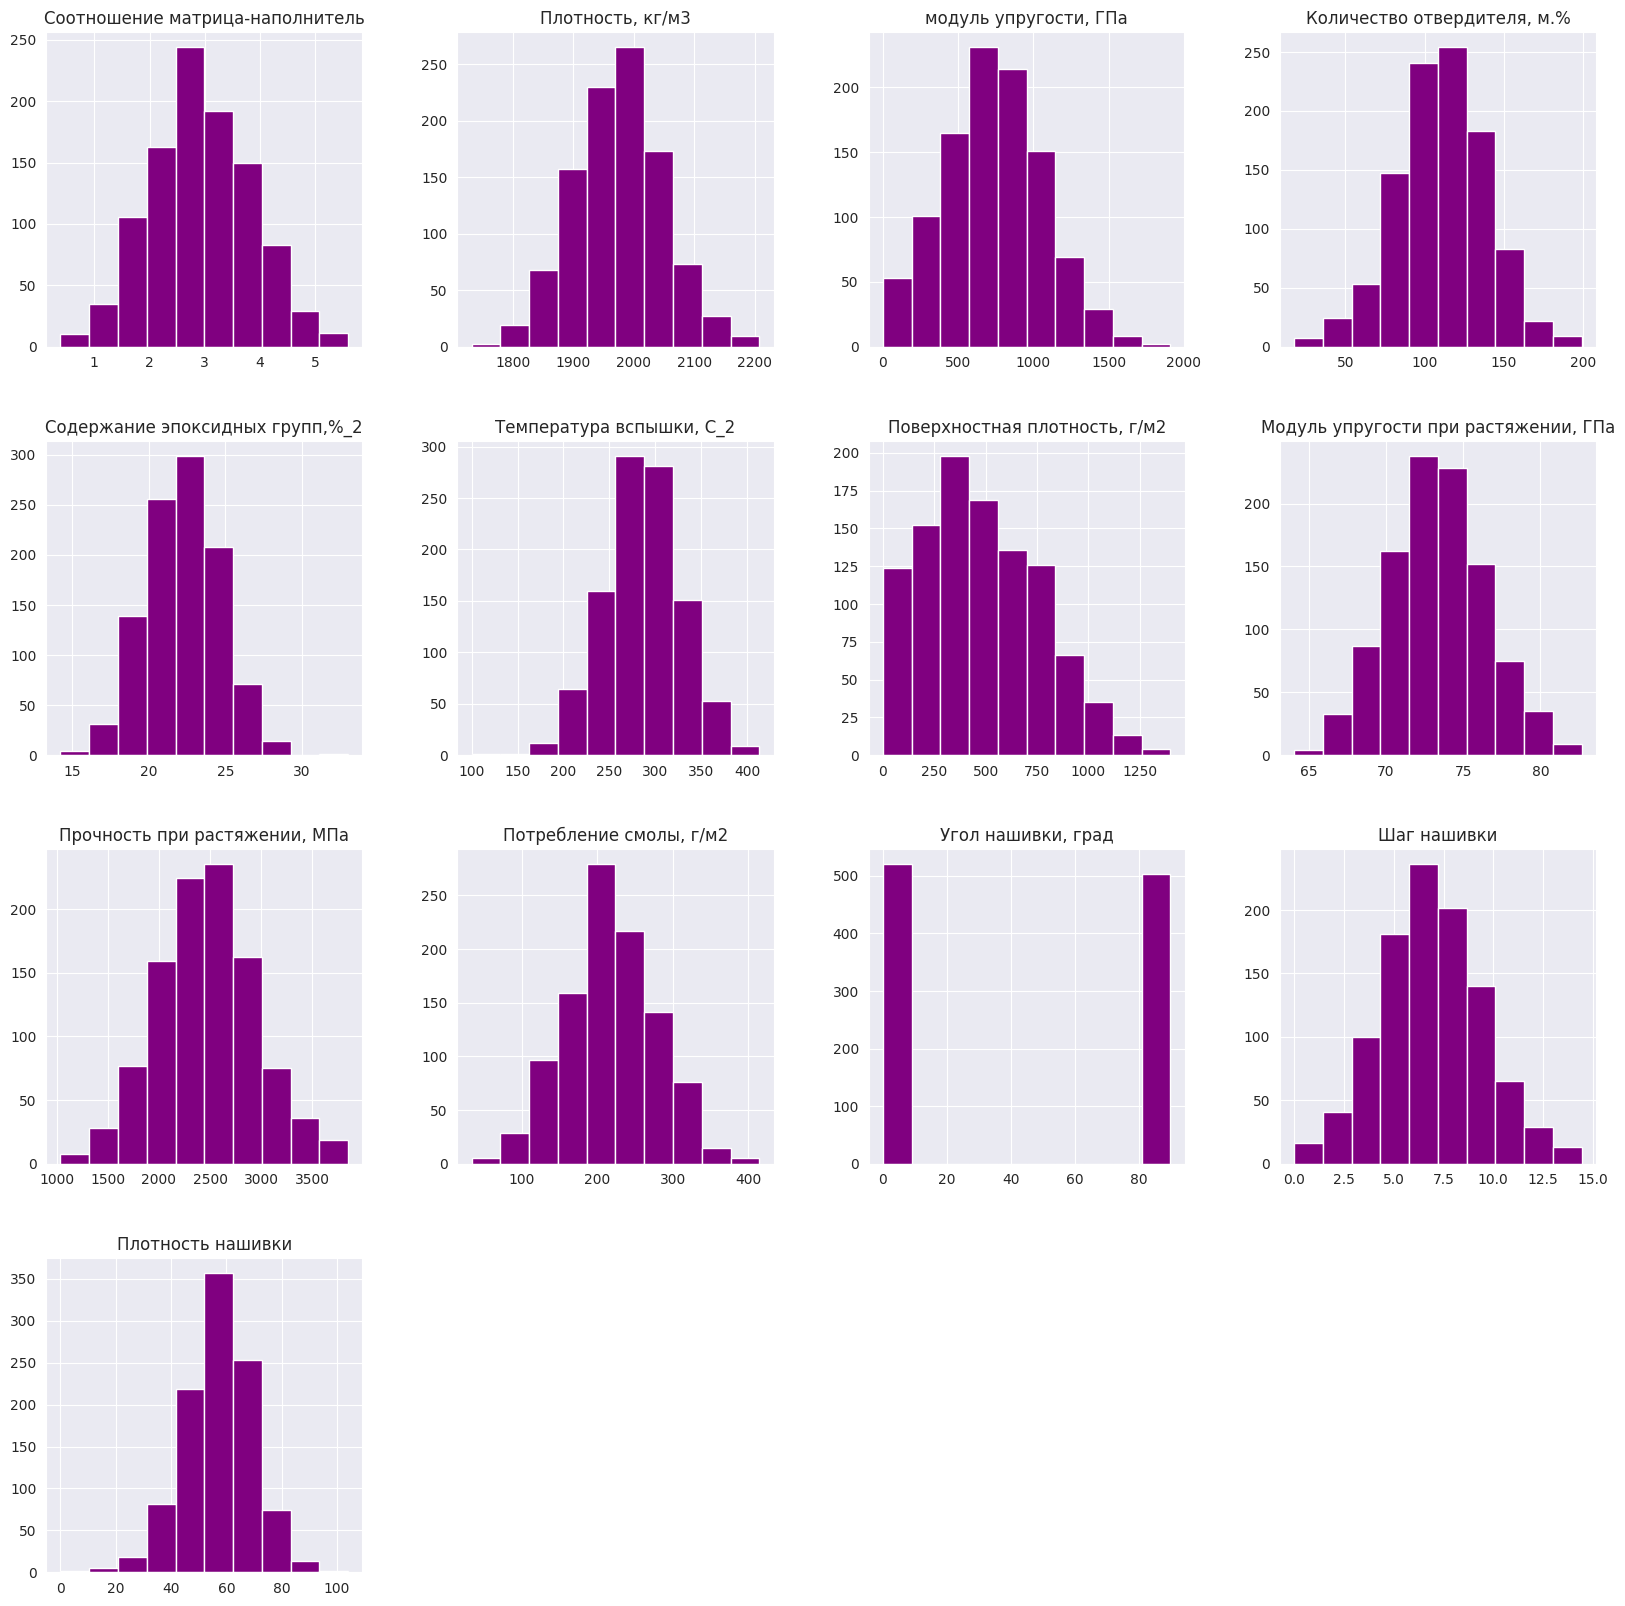

In [9]:
df.hist(figsize = (20,20), color = "purple")

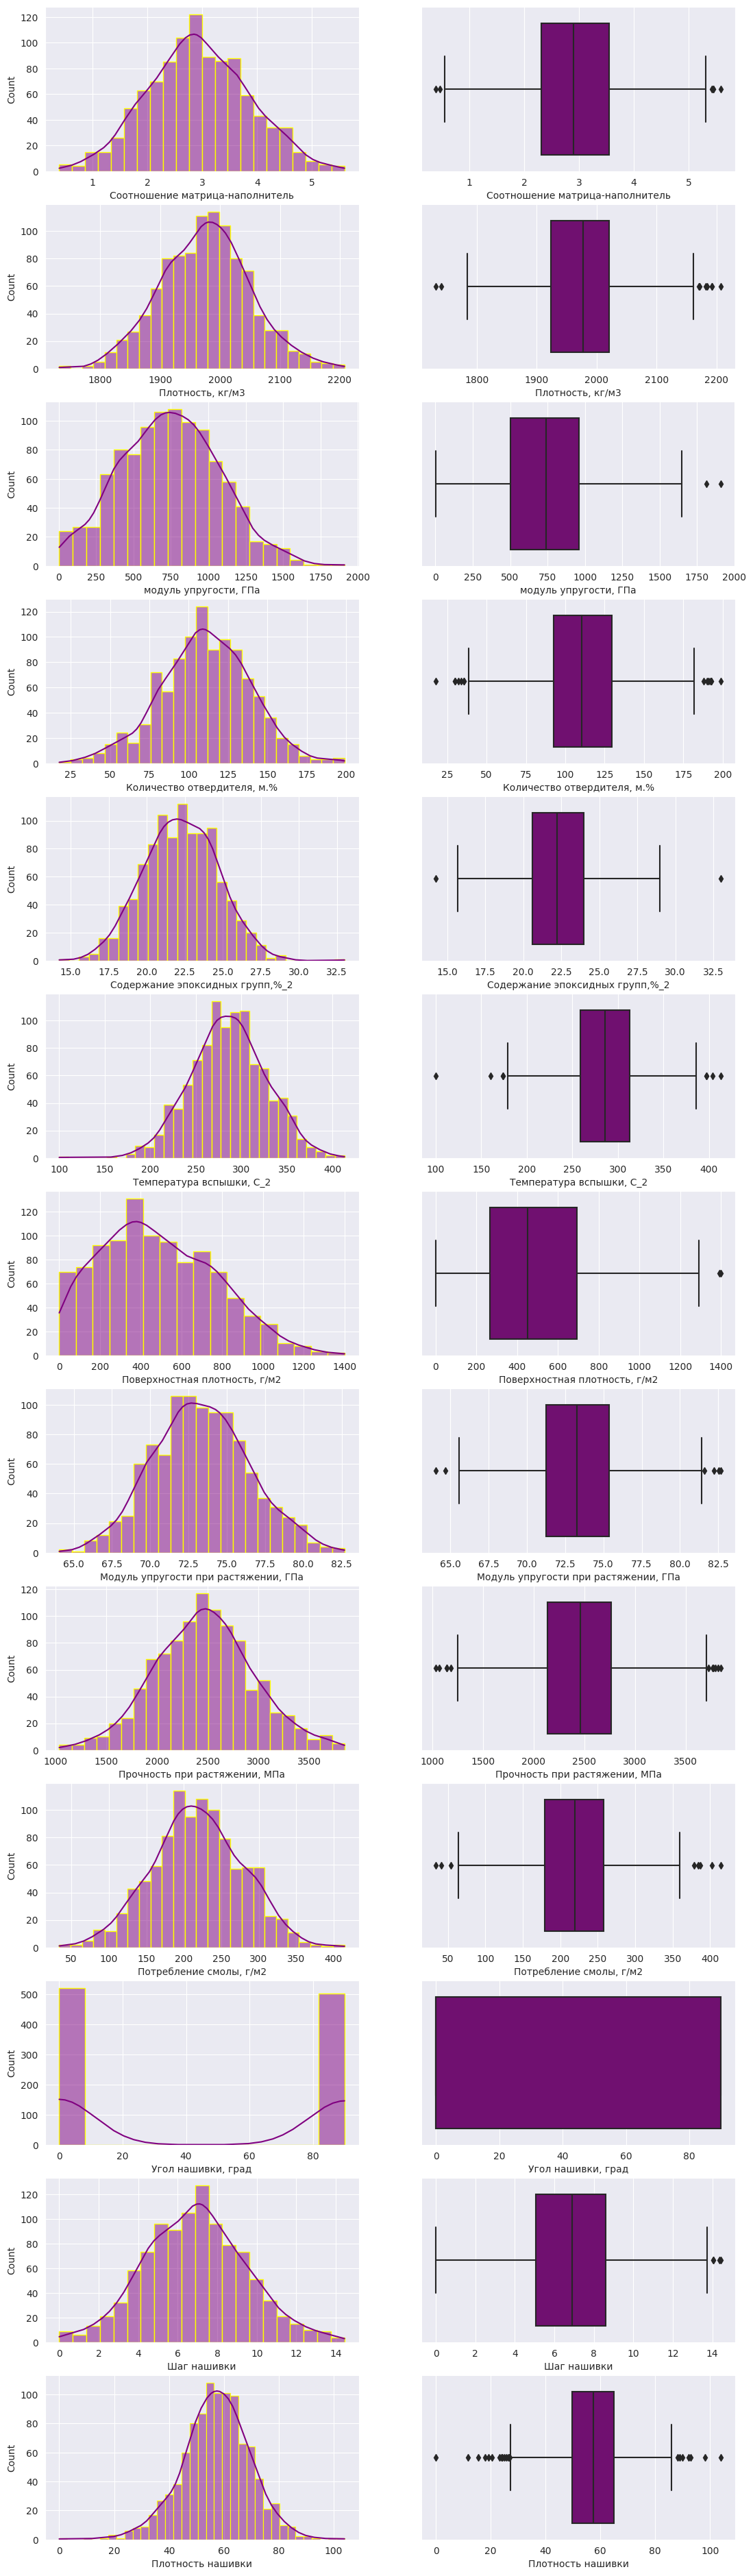

In [10]:
# Для наглядности построим гистрограммы распределения и ящики с усами рядом
fig, axes = plt.subplots(13, 2, figsize=(13, 48))
for i, column in enumerate(df.columns):
  sns.histplot(data=df, x=column, color='purple', edgecolor='yellow', kde=True, ax=axes[i,0])
  sns.boxplot(data=df, x=column, color='purple', ax=axes[i,1])
plt.show()

Выводы:
1. Угол нашивки является дискретной величиной. 
2. Значения Поверхностной плотности имеют Пуассоновское распределение. 
3. Все остальные распределения близки к нормальному.



# Тепловая карта коэффициентов корреляции до нормализации

<Axes: >

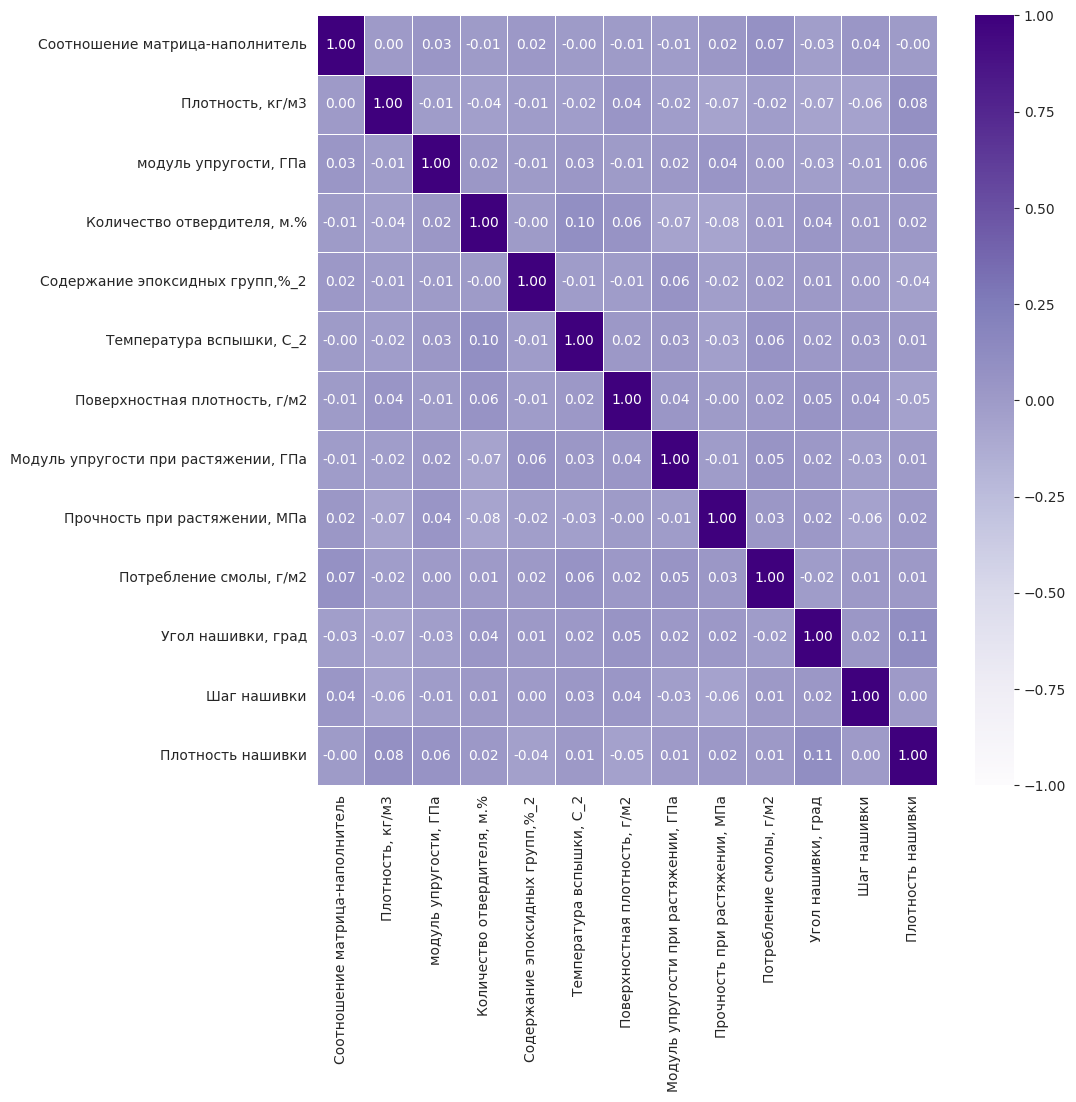

In [11]:
plt.rcParams['figure.figsize']=(10,10)
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, center= 0, fmt=".2f", linewidths=.5, cmap= 'Purples')

Самая большая корреляция из рассматриваемых (по убыванию):
* Угол нашивки/Плотность нашивки 0,11
* Температура вспышки/Количество отвердителя 0,10
* Плотность/Плотность нашивки 0,08
* Прочность при растяжении/Количество отвердителя - обратная корреляция -0,08
* Потребление смолы/Соотношение матрица-наполнитель 0,07
* Модуль упругости при растяжении/Количество отвердителя - обратная корреляция -0,07

# Диаграммы рассеяния

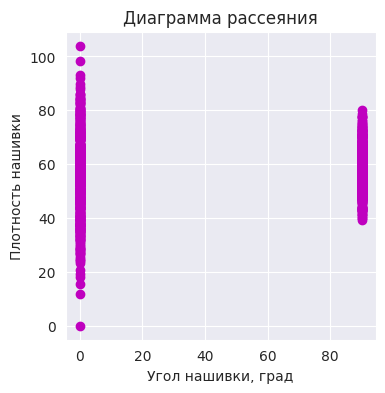

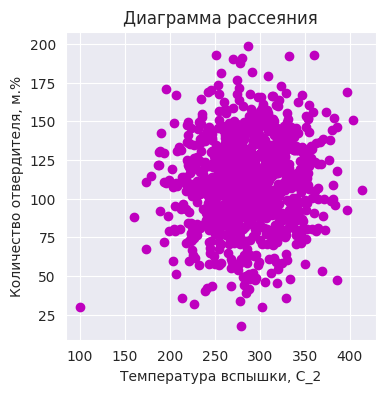

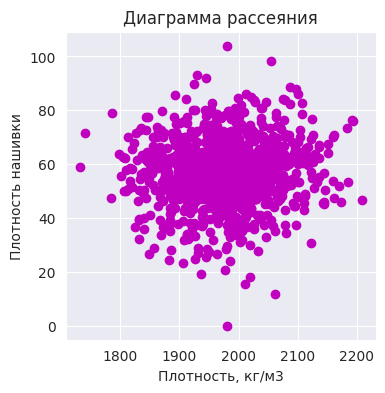

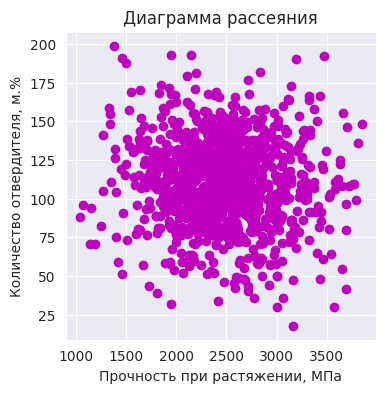

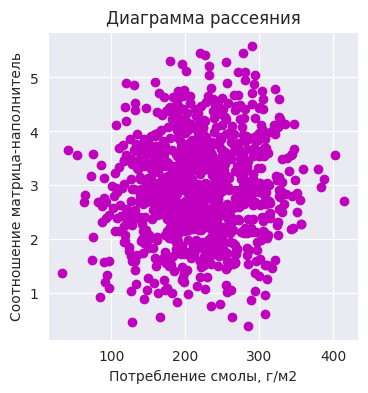

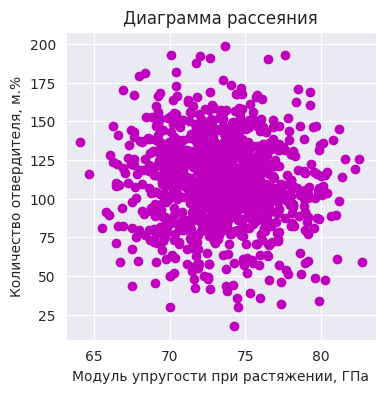

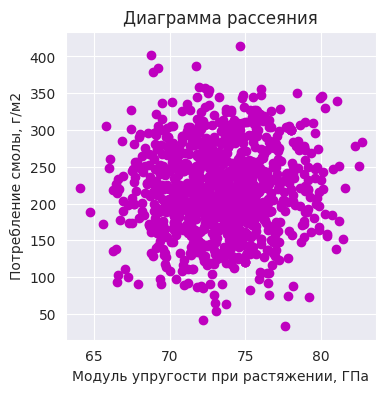

<Figure size 400x400 with 0 Axes>

<Figure size 400x400 with 0 Axes>

In [12]:
plt.figure(figsize=(4,4))
def plot_scatter(x, y, title, x_label, ylabel, c="m"):
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(ylabel)
    plt.scatter(x, y, c=c)
    plt.show()

plot_scatter(df["Угол нашивки, град"], df["Плотность нашивки"], #корреляция 0,11
             "Диаграмма рассеяния", "Угол нашивки, град", "Плотность нашивки", c="m")
plt.figure(figsize=(4,4))
plot_scatter(df["Температура вспышки, С_2"], df["Количество отвердителя, м.%"], #корреляция 0,10
             "Диаграмма рассеяния", "Температура вспышки, С_2", "Количество отвердителя, м.%", c="m")
plt.figure(figsize=(4,4))
plot_scatter(df["Плотность, кг/м3"], df["Плотность нашивки"], #корреляция 0,08
             "Диаграмма рассеяния", "Плотность, кг/м3", "Плотность нашивки", c="m")
plt.figure(figsize=(4,4))
plot_scatter(df["Прочность при растяжении, МПа"], df["Количество отвердителя, м.%"], #корреляция -0,08
             "Диаграмма рассеяния", "Прочность при растяжении, МПа", "Количество отвердителя, м.%", c="m")
plt.figure(figsize=(4,4))
plot_scatter(df["Потребление смолы, г/м2"], df["Соотношение матрица-наполнитель"], #корреляция 0,07
             "Диаграмма рассеяния", "Потребление смолы, г/м2", "Соотношение матрица-наполнитель", c="m")
plt.figure(figsize=(4,4))
plot_scatter(df["Модуль упругости при растяжении, ГПа"], df["Количество отвердителя, м.%"], #корреляция -0,07
             "Диаграмма рассеяния", "Модуль упругости при растяжении, ГПа", "Количество отвердителя, м.%", c="m")
plt.figure(figsize=(4,4))

plot_scatter(df["Модуль упругости при растяжении, ГПа"], df["Потребление смолы, г/м2"], #корреляция 0,00
             "Диаграмма рассеяния", "Модуль упругости при растяжении, ГПа", "Потребление смолы, г/м2", c="m")
plt.figure(figsize=(4,4))

# Диаграммы ящика с усами

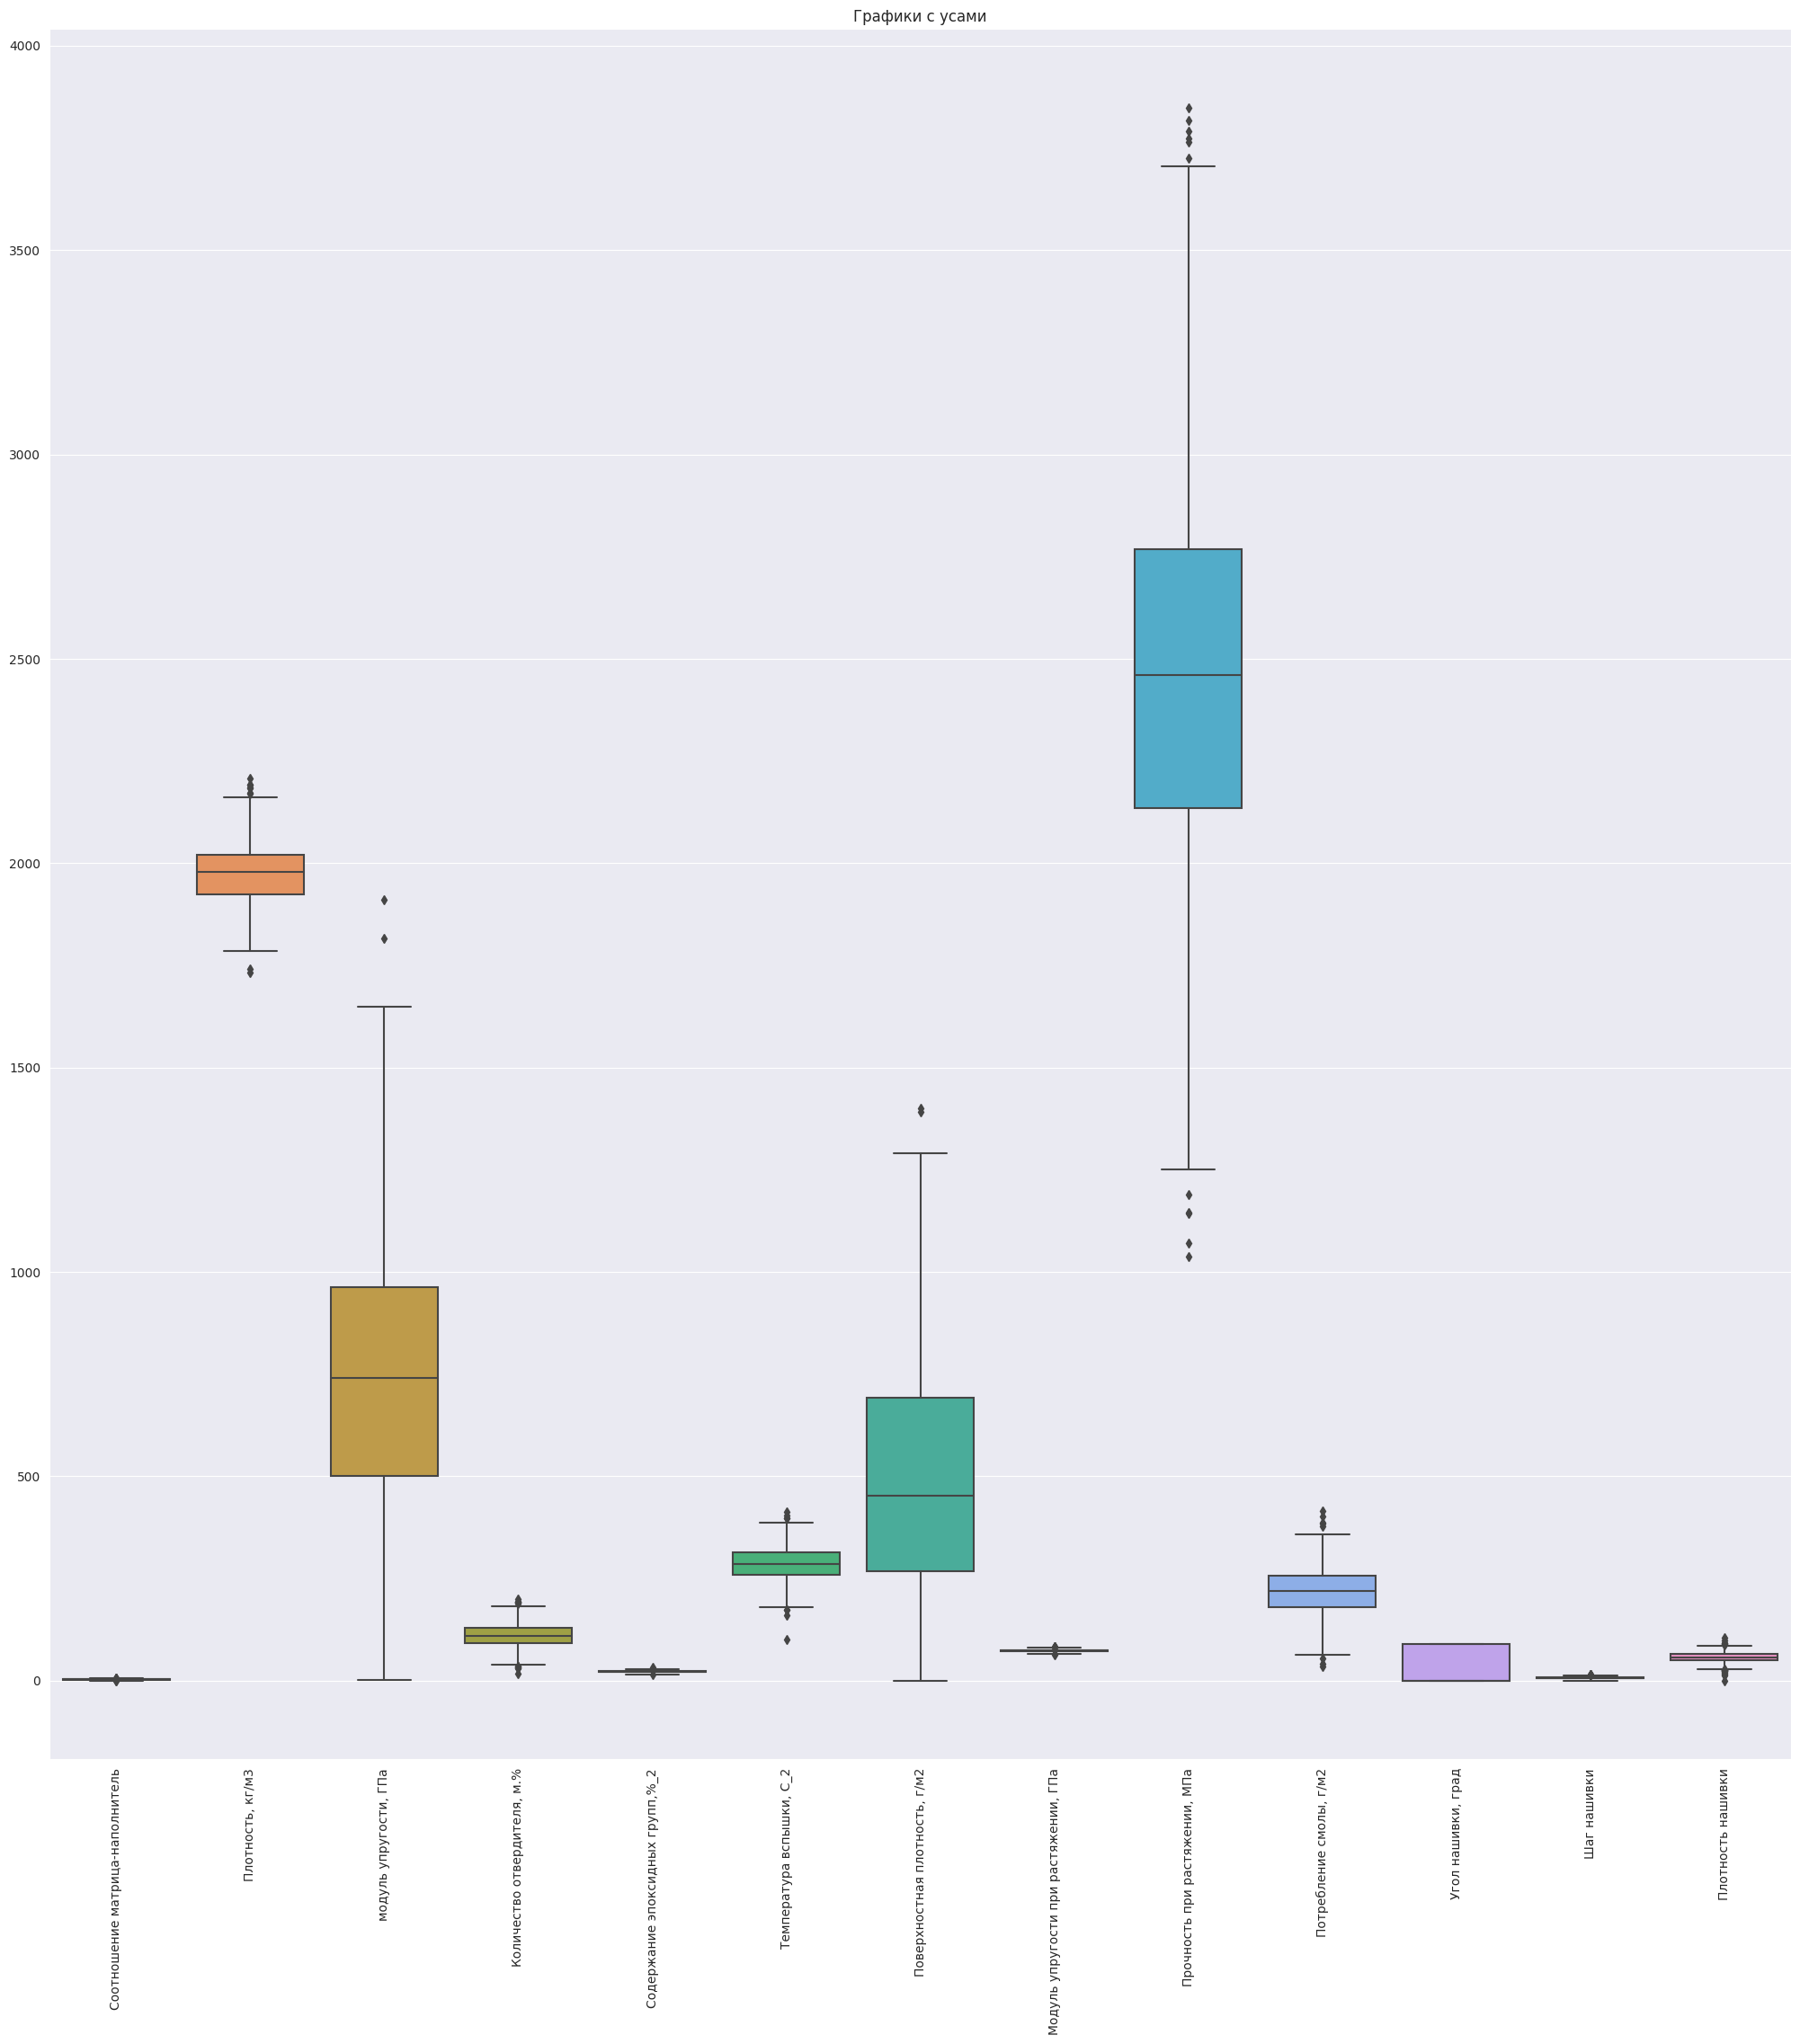

In [13]:
plt.figure(figsize=(25,25))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title('Графики с усами')
plt.show()

# Построение попарного графика
Часто используется в исследовательском анализе, чтобы понять взаимосвязь между всеми возможными парами числовых переменных.

In [14]:
plt.figure(figsize=(10,10))
sns.set(style = 'white', palette ='Purples_r')
g = sns.PairGrid(df, diag_sharey = False, height =4)
g.map_upper(sns.scatterplot)
g.map_diag(sns.histplot, kde = True)
g.map_lower(sns.scatterplot)

Output hidden; open in https://colab.research.google.com to view.

In [15]:
#Верхний-правый угол - графики плотности ядра, Нижний-левый - графики рассеяния, между ними -  графики распределения.
sns.set(style = 'white', palette ='Purples_r')
grids = sns.PairGrid(df, diag_sharey = False, height =4)
grids.map_diag(sns.distplot, kde = True)
grids.map_upper(sns.kdeplot)
grids.map_lower(sns.scatterplot)

Output hidden; open in https://colab.research.google.com to view.

# Исключение выбросов с помощью метода Изолирующий лес
Метод IsolationForest «изолирует» наблюдения, случайным образом выбирая признак, а затем случайным образом выбирая значение разделения между максимальным и минимальным значениями выбранного признака.

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


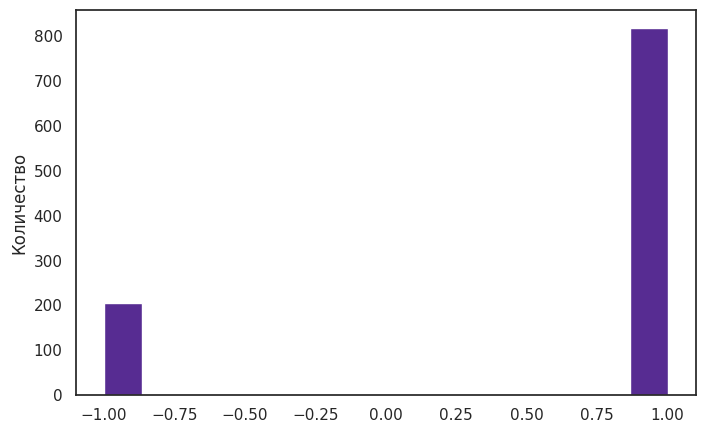

In [12]:
plt.figure(figsize=(8,5))
sns.set(style = 'white', palette ='Purples_r')
from sklearn.ensemble import IsolationForest
isf = IsolationForest(n_estimators=100, random_state=42, contamination=0.2)
preds = isf.fit_predict(df)
plot_hist(preds)

Выявлено более 200 выбросов, что очень много для общего количества данных. Поэтому принято решение не применять этот метод исключения выбросов.

# Исключение выбросов с помощью правила 3-х сигм
1. Для каждого столбца сначала вычисляется Z-оценка каждого значения в столбце относительно среднего значения столбца и стандартного отклонения.
2. Тогда это принимает абсолют Z-счета, потому что направление не имеет значения, только если оно ниже порога.
3. all (axis = 1) гарантирует, что для каждой строки все столбцы удовлетворяют ограничению.
4. Результат этого условия используется для индексации кадра данных.

In [13]:
from scipy import stats
df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0,4.000000,60.000000
3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0,5.000000,47.000000
4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.000000,57.000000
5,2.767918,2000.000000,748.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.000000,60.000000
6,2.569620,1910.000000,807.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.000000,70.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,90,9.076380,47.019770
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,90,10.565614,53.750790
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,90,4.161154,67.629684
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,90,6.313201,58.261074


In [14]:
#Описательная статистика после исключения выбросов
df1 = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
df=df1
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Соотношение матрица-наполнитель,999.0,2.937129,0.908854,0.389403,2.321061,2.908835,3.554960,5.591742
"Плотность, кг/м3",999.0,1975.463852,72.964410,1784.482245,1923.706033,1977.339047,2021.173086,2192.738783
"модуль упругости, ГПа",999.0,738.450188,327.631773,2.436909,500.047452,741.037038,959.442359,1649.415706
"Количество отвердителя, м.%",999.0,110.874067,27.834697,29.956150,92.577613,110.689775,129.884490,192.851702
"Содержание эпоксидных групп,%_2",999.0,22.233969,2.384916,15.695894,20.583073,22.220097,23.976789,28.955094
"Температура вспышки, С_2",999.0,285.964652,40.250987,173.484920,259.066528,285.896812,313.034785,403.652861
"Поверхностная плотность, г/м2",999.0,479.541965,277.670164,0.603740,266.816645,450.429300,690.822854,1291.340115
"Модуль упругости при растяжении, ГПа",999.0,73.308804,3.101230,64.054061,71.245018,73.219286,75.322176,82.525773
"Прочность при растяжении, МПа",999.0,2465.907130,484.135114,1036.856605,2135.292972,2456.395009,2760.573255,3848.436732
"Потребление смолы, г/м2",999.0,218.188960,58.938558,41.048278,179.766002,218.448971,257.330831,386.903431


Вывод: данный метод исключения выбросов показывает, что необходимо исключить 24 строки с выбросами (всего 1 023 строк, получаем после удаления 999 строк).

# Исключения выбросов с помощью метода IQR

In [19]:
lower_bound = df.quantile(q=0.025)
upper_bound = df.quantile(q=0.975)
df[(df < lower_bound) | (df > upper_bound)]
df2 = df[(df < lower_bound) | (df > upper_bound)]
df2.dropna()     #удалим все строки со значением NaN, т.е. оставим только строки с выбросами
df2.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,0.0,50.000000,50.000000
mean,2.990755,1984.028195,773.765997,109.383673,22.264401,286.181560,581.393460,73.524710,2493.913414,215.947267,NaN,7.105490,56.334559
std,2.099035,171.012158,733.759331,66.739778,5.418127,93.079276,574.198915,7.163755,1167.420507,134.805201,NaN,6.140117,28.718981
min,0.389403,1784.482245,2.436909,29.956150,15.695894,173.484920,0.603740,64.054061,1036.856605,41.048278,NaN,0.037639,20.571633
25%,1.004186,1817.164000,44.165112,45.307413,17.008201,195.731868,14.404371,66.613143,1387.146579,88.304352,NaN,1.266747,28.452266
50%,2.936199,1978.883587,755.343193,108.753290,22.207596,285.403618,543.758436,73.600128,2488.478867,216.481693,NaN,7.020952,56.113545
75%,5.016436,2145.232803,1484.389085,170.752359,27.444731,376.132285,1140.089096,80.250742,3650.049017,344.978539,NaN,13.137665,84.000747
max,5.591742,2192.738783,1649.415706,192.851702,28.955094,403.652861,1291.340115,82.525773,3848.436732,386.903431,NaN,14.440522,92.963492


По методу удаления IQR получается 52 строки с выбросами.
Я остановаюсь на методе 3-х сигм, т.к. он удаляет меньше данных (выбросов), а именно - 24 строки.
Это решение связано с тем, чтобы сохранить большее количество данных для обработки, т.к. то, как они распределены, не говорит о присутствии явных аномалий.

In [20]:
df = df1
df.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,2.937129,1975.463852,738.450188,110.874067,22.233969,285.964652,479.541965,73.308804,2465.907130,218.188960,44.684685,6.910734,57.283879
std,0.908854,72.964410,327.631773,27.834697,2.384916,40.250987,277.670164,3.101230,484.135114,58.938558,45.021434,2.559025,11.849293
min,0.389403,1784.482245,2.436909,29.956150,15.695894,173.484920,0.603740,64.054061,1036.856605,41.048278,0.000000,0.037639,20.571633
25%,2.321061,1923.706033,500.047452,92.577613,20.583073,259.066528,266.816645,71.245018,2135.292972,179.766002,0.000000,5.098161,49.946682
50%,2.908835,1977.339047,741.037038,110.689775,22.220097,285.896812,450.429300,73.219286,2456.395009,218.448971,0.000000,6.928247,57.499988
75%,3.554960,2021.173086,959.442359,129.884490,23.976789,313.034785,690.822854,75.322176,2760.573255,257.330831,90.000000,8.591215,64.944961
max,5.591742,2192.738783,1649.415706,192.851702,28.955094,403.652861,1291.340115,82.525773,3848.436732,386.903431,90.000000,14.440522,92.963492


In [21]:
#Верхний-правый угол - графики плотности ядра, Нижний-левый - графики рассеяния, между ними -  графики распределения.
sns.set(style = 'white', palette ='Purples_r')
grids = sns.PairGrid(df, diag_sharey = False, height =4)
grids.map_diag(sns.distplot, kde = True)
grids.map_upper(sns.kdeplot)
grids.map_lower(sns.scatterplot)

Output hidden; open in https://colab.research.google.com to view.

# Нормализация
Ключевая цель нормализации — приведение различных данных в самых разных единицах измерения и диапазонах значений к единому виду, который позволит сравнивать их между собой или использовать для расчёта схожести объектов.

In [15]:
# Использование MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df1)
scaled_features = scaler.transform(df1)
df_MinMax = pd.DataFrame(data = scaled_features, 
columns = df1.columns)

df_MinMax.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.282131,0.601381,0.447061,0.123047,0.607435,0.482823,0.16223,0.321894,0.698235,0.517418,0.0,0.275109,0.544652
1,0.282131,0.601381,0.447061,0.608021,0.418887,0.549664,0.16223,0.321894,0.698235,0.517418,0.0,0.344539,0.365074
2,0.457857,0.601381,0.455721,0.502800,0.495653,0.482823,0.16223,0.321894,0.698235,0.517418,0.0,0.344539,0.503211
3,0.457201,0.527898,0.452685,0.502800,0.495653,0.482823,0.16223,0.321894,0.698235,0.517418,0.0,0.344539,0.544652
4,0.419084,0.307448,0.488508,0.502800,0.495653,0.482823,0.16223,0.321894,0.698235,0.517418,0.0,0.344539,0.682789


In [16]:
df_MinMax.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Соотношение матрица-наполнитель,999.0,0.489727,0.174701,0.0,0.371306,0.484288,0.608487,1.0
"Плотность, кг/м3",999.0,0.467798,0.178722,0.0,0.341020,0.472391,0.579760,1.0
"модуль упругости, ГПа",999.0,0.446887,0.198929,0.0,0.302135,0.448458,0.581067,1.0
"Количество отвердителя, м.%",999.0,0.496747,0.170875,0.0,0.384427,0.495616,0.613450,1.0
"Содержание эпоксидных групп,%_2",999.0,0.493097,0.179869,0.0,0.368588,0.492051,0.624540,1.0
"Температура вспышки, С_2",999.0,0.488685,0.174877,0.0,0.371822,0.488391,0.606296,1.0
"Поверхностная плотность, г/м2",999.0,0.371058,0.215125,0.0,0.206249,0.348503,0.534748,1.0
"Модуль упругости при растяжении, ГПа",999.0,0.501023,0.167891,0.0,0.389296,0.496176,0.610020,1.0
"Прочность при растяжении, МПа",999.0,0.508273,0.172193,0.0,0.390683,0.504890,0.613078,1.0
"Потребление смолы, г/м2",999.0,0.512182,0.170414,0.0,0.401086,0.512933,0.625356,1.0


In [17]:
#Диаграммы распределения после нормализации
def plot_hist(x, title="", xlabel=""):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Количество")
    plt.hist(x, bins = 15)
    plt.show()

array([[<Axes: title={'center': 'Соотношение матрица-наполнитель'}>,
        <Axes: title={'center': 'Плотность, кг/м3'}>,
        <Axes: title={'center': 'модуль упругости, ГПа'}>,
        <Axes: title={'center': 'Количество отвердителя, м.%'}>],
       [<Axes: title={'center': 'Содержание эпоксидных групп,%_2'}>,
        <Axes: title={'center': 'Температура вспышки, С_2'}>,
        <Axes: title={'center': 'Поверхностная плотность, г/м2'}>,
        <Axes: title={'center': 'Модуль упругости при растяжении, ГПа'}>],
       [<Axes: title={'center': 'Прочность при растяжении, МПа'}>,
        <Axes: title={'center': 'Потребление смолы, г/м2'}>,
        <Axes: title={'center': 'Угол нашивки, град'}>,
        <Axes: title={'center': 'Шаг нашивки'}>],
       [<Axes: title={'center': 'Плотность нашивки'}>, <Axes: >,
        <Axes: >, <Axes: >]], dtype=object)

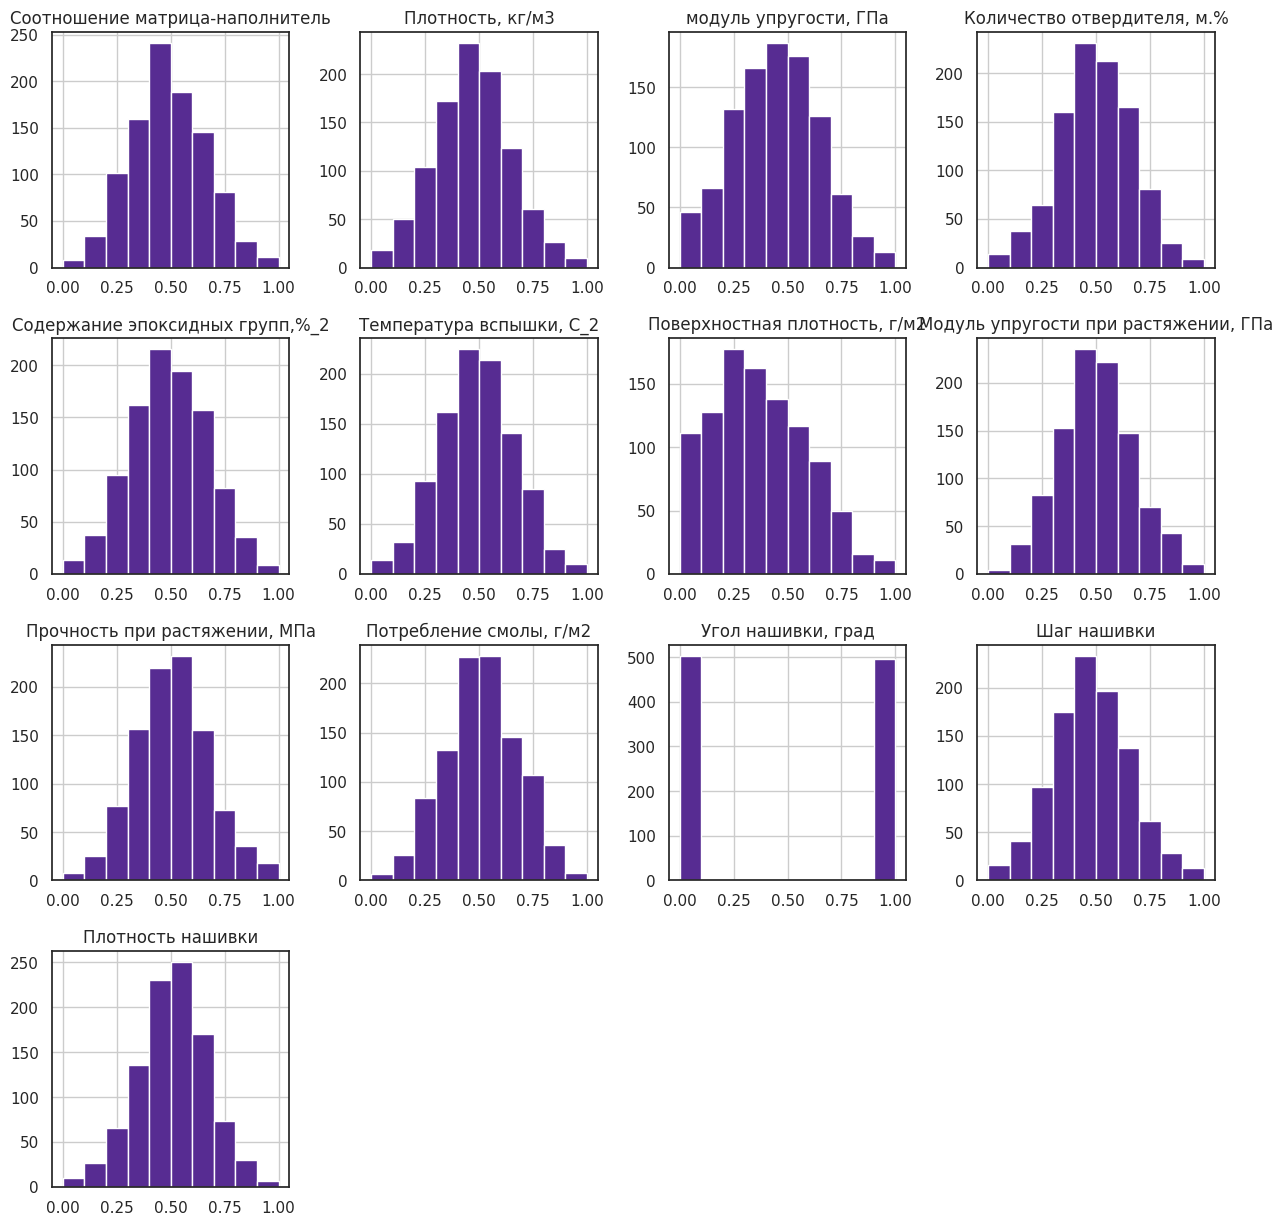

In [18]:
df_MinMax.hist(figsize = (15,15))

In [26]:
#Верхний-правый угол - графики плотности ядра, Нижний-левый - графики рассеяния, между ними -  графики распределения.
sns.set(style = 'white', palette ='Purples_r')
grids = sns.PairGrid(df_MinMax, diag_sharey = False, height =5)
grids.map_diag(sns.distplot, kde = True)
grids.map_upper(sns.kdeplot)
grids.map_lower(sns.scatterplot)

Output hidden; open in https://colab.research.google.com to view.

# Использование максимального абсолютного масштабирования
Максимальное абсолютное масштабирование нормализует значения в диапазоне от нуля до единицы. 

In [ ]:
df_maxabs = pd.DataFrame(data = scaled_features, columns = df.columns)
for columns in df.columns:
    df[columns] = df[columns] / df[columns].abs().max()
df_maxabs.head()

<ipython-input-27-190f64a6257e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns] = df[columns] / df[columns].abs().max()


,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.282131,0.601381,0.447061,0.123047,0.607435,0.482823,0.16223,0.321894,0.698235,0.517418,0.0,0.275109,0.544652
1,0.282131,0.601381,0.447061,0.608021,0.418887,0.549664,0.16223,0.321894,0.698235,0.517418,0.0,0.344539,0.365074
2,0.457857,0.601381,0.455721,0.502800,0.495653,0.482823,0.16223,0.321894,0.698235,0.517418,0.0,0.344539,0.503211
3,0.457201,0.527898,0.452685,0.502800,0.495653,0.482823,0.16223,0.321894,0.698235,0.517418,0.0,0.344539,0.544652
4,0.419084,0.307448,0.488508,0.502800,0.495653,0.482823,0.16223,0.321894,0.698235,0.517418,0.0,0.344539,0.682789


In [ ]:
df_maxabs.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,0.489727,0.467798,0.446887,0.496747,0.493097,0.488685,0.371058,0.501023,0.508273,0.512182,0.496496,0.477203,0.507132
std,0.174701,0.178722,0.198929,0.170875,0.179869,0.174877,0.215125,0.167891,0.172193,0.170414,0.500238,0.177675,0.163683
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.371306,0.341020,0.302135,0.384427,0.368588,0.371822,0.206249,0.389296,0.390683,0.401086,0.000000,0.351355,0.405778
50%,0.484288,0.472391,0.448458,0.495616,0.492051,0.488391,0.348503,0.496176,0.504890,0.512933,0.000000,0.478419,0.510118
75%,0.608487,0.579760,0.581067,0.613450,0.624540,0.606296,0.534748,0.610020,0.613078,0.625356,1.000000,0.593879,0.612960
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
sns.set(style = 'white', palette ='Purples_r')
grids = sns.PairGrid(df_maxabs, diag_sharey = False, height =4)
grids.map_diag(sns.distplot, kde = True)
grids.map_upper(sns.kdeplot)
grids.map_lower(sns.scatterplot)

Output hidden; open in https://colab.research.google.com to view.

# Использование метода z-оценки. 
Метод преобразует информацию в распределение. Метод z-оценки вычисляет среднее значение каждого столбца, затем вычитает его из каждого столбца и, наконец, делит на стандартное отклонение.

In [19]:
scaler = StandardScaler()
scaler.fit(df)
scaled_features = scaler.transform(df)
df_z = pd.DataFrame(data = scaled_features, 
columns = df.columns)

df_z.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,-1.188889,0.747809,0.000875,-2.188080,0.635993,-0.033538,-0.971213,-1.067467,1.103742,0.030743,-0.993017,-1.138008,0.229337
1,-1.188889,0.747809,0.000875,0.651525,-0.412787,0.348870,-0.971213,-1.067467,1.103742,0.030743,-0.993017,-0.747039,-0.868324
2,-0.182517,0.747809,0.044431,0.035439,0.014216,-0.033538,-0.971213,-1.067467,1.103742,0.030743,-0.993017,-0.747039,-0.023969
3,-0.186274,0.336444,0.029163,0.035439,0.014216,-0.033538,-0.971213,-1.067467,1.103742,0.030743,-0.993017,-0.747039,0.229337
4,-0.404568,-0.897652,0.209333,0.035439,0.014216,-0.033538,-0.971213,-1.067467,1.103742,0.030743,-0.993017,-0.747039,1.073692


In [20]:
df_z.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Соотношение матрица-наполнитель,999.0,1.458071e-16,1.000501,-2.804633,-0.678191,-0.031148,0.680131,2.922296
"Плотность, кг/м3",999.0,-3.086842e-15,1.000501,-2.618774,-0.709712,0.025713,0.626773,2.979312
"модуль упругости, ГПа",999.0,6.045659e-17,1.000501,-2.247590,-0.728019,0.007900,0.674852,2.781848
"Количество отвердителя, м.%",999.0,-1.084662e-16,1.000501,-2.908544,-0.657655,-0.006624,0.683318,2.946635
"Содержание эпоксидных групп,%_2",999.0,-2.858352e-16,1.000501,-2.742801,-0.692571,-0.005819,0.731134,2.819592
"Температура вспышки, С_2",999.0,-1.991511e-16,1.000501,-2.795859,-0.668595,-0.001686,0.672870,2.925323
"Поверхностная плотность, г/м2",999.0,1.582540e-16,1.000501,-1.725710,-0.766492,-0.104899,0.761287,2.925070
"Модуль упругости при растяжении, ГПа",999.0,2.875244e-15,1.000501,-2.985712,-0.665807,-0.028880,0.649542,2.973525
"Прочность при растяжении, МПа",999.0,6.259035e-16,1.000501,-2.953238,-0.683239,-0.019657,0.608949,2.857099
"Потребление смолы, г/м2",999.0,8.712861e-17,1.000501,-3.007020,-0.652242,0.004414,0.664446,2.863982


In [21]:
sns.set(style = 'white', palette ='Purples_r')
grids = sns.PairGrid(df_z, diag_sharey = False, height =4)
grids.map_diag(sns.distplot, kde = True)
grids.map_upper(sns.kdeplot)
grids.map_lower(sns.scatterplot)

Output hidden; open in https://colab.research.google.com to view.

# Множественная линейная регрессия

In [22]:
from pandas import read_csv, DataFrame
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


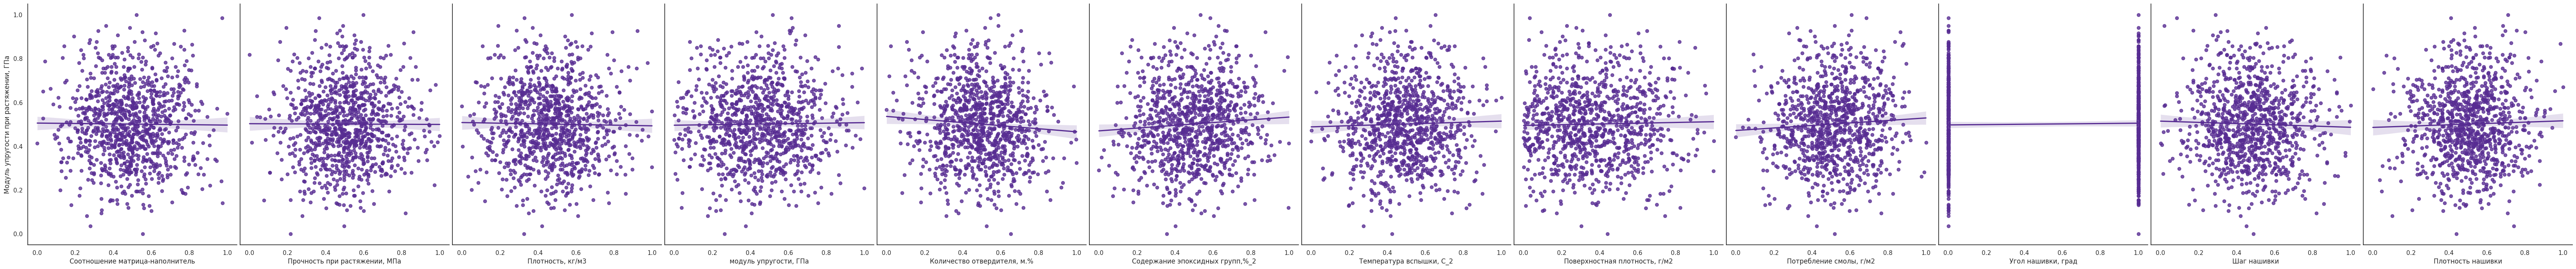

In [23]:
sns.pairplot(df_MinMax, x_vars=["Соотношение матрица-наполнитель", "Прочность при растяжении, МПа", 'Плотность, кг/м3', 
                                'модуль упругости, ГПа', 'Количество отвердителя, м.%', 'Содержание эпоксидных групп,%_2', 
                                'Температура вспышки, С_2', 'Поверхностная плотность, г/м2', 'Потребление смолы, г/м2',
                                'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки'], y_vars='Модуль упругости при растяжении, ГПа', height=7, aspect=0.8, kind = 'reg')
plt.savefig("pairplot.jpg")
plt.show()

In [24]:
df_MinMax.corr()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
Соотношение матрица-наполнитель,1.000000,0.004226,0.044539,-0.006647,0.023488,-0.010611,-0.012322,-0.009516,0.023719,0.062625,-0.041373,0.043592,0.008647
"Плотность, кг/м3",0.004226,1.000000,-0.004100,-0.041654,-0.006227,-0.016798,0.045103,-0.015994,-0.081433,-0.016568,-0.056748,-0.047795,0.094173
"модуль упругости, ГПа",0.044539,-0.004100,1.000000,0.028704,-0.010568,0.030355,-0.004077,0.013793,0.038611,0.006803,-0.032095,-0.005988,0.068006
"Количество отвердителя, м.%",-0.006647,-0.041654,0.028704,1.000000,0.000105,0.085865,0.058037,-0.071357,-0.059566,0.021549,0.035273,-0.001002,0.012081
"Содержание эпоксидных групп,%_2",0.023488,-0.006227,-0.010568,0.000105,1.000000,-0.006679,-0.008788,0.067355,-0.025857,0.014607,0.012766,0.006837,-0.039438
"Температура вспышки, С_2",-0.010611,-0.016798,0.030355,0.085865,-0.006679,1.000000,0.028583,0.027321,-0.020762,0.051768,0.009038,0.020119,-0.007371
"Поверхностная плотность, г/м2",-0.012322,0.045103,-0.004077,0.058037,-0.008788,0.028583,1.000000,0.021924,-0.008100,0.003082,0.051710,0.043876,-0.029689
"Модуль упругости при растяжении, ГПа",-0.009516,-0.015994,0.013793,-0.071357,0.067355,0.027321,0.021924,1.000000,-0.003492,0.058045,0.023430,-0.029680,0.029278
"Прочность при растяжении, МПа",0.023719,-0.081433,0.038611,-0.059566,-0.025857,-0.020762,-0.008100,-0.003492,1.000000,0.028301,0.019031,-0.057403,0.029563
"Потребление смолы, г/м2",0.062625,-0.016568,0.006803,0.021549,0.014607,0.051768,0.003082,0.058045,0.028301,1.000000,-0.017138,0.013464,0.020144


# Выбор модели

In [25]:
#Отделим от нашей выборки прогнозные значения:
trg = df_MinMax[['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа']]
trn = df_MinMax.drop(['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа'], axis=1)

In [26]:
#Поместим все модели в один список для удобства дальнейшего анализа:
models = [LinearRegression(), # линейная регрессия
          KNeighborsRegressor(n_neighbors=10), # метод ближайших соседей
          SVR(kernel='linear'), # метод опорных векторов с линейным ядром
          RandomForestRegressor(n_estimators=100, max_features ='sqrt'), # случайный лес
          ]

In [27]:
#30% данных оставим на тестирование модели, на остальных происходит обучение моделей
Xtrn, Xtest, Ytrn, Ytest = train_test_split(trn, trg, test_size=0.3)


In [28]:
#Необходимо спрогнозировать 2 параметра ('Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа')
#Необходимо построить регрессию для каждого из них. Для дальнейшего анализа, можно записать полученные результаты во временный DataFrame. Сделать это можно так:
#создаем временные структуры
TestModels = DataFrame()
tmp = {}
#для каждой модели из списка
for model in models:
	  #получаем имя модели
	  m = str(model)
	  tmp['Model'] = m[:m.index('(')]    
	  #для каждого столбца результирующего набора
	  for i in range(Ytrn.shape[1]):
	      #обучаем модель
	      model.fit(Xtrn, Ytrn.iloc[:,i].values)
	      #вычисляем коэффициент детерминации
	      tmp['R2_Y%s'%str(i+1)] = r2_score(Ytest.iloc[:,0].values, model.predict(Xtest))
    #записываем данные и итоговый DataFrame
	  TestModels = TestModels.append([tmp])
#делаем индекс по названию модели
TestModels.set_index('Model', inplace=True)

<ipython-input-28-630ddca18447>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TestModels = TestModels.append([tmp])
<ipython-input-28-630ddca18447>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TestModels = TestModels.append([tmp])
<ipython-input-28-630ddca18447>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TestModels = TestModels.append([tmp])
<ipython-input-28-630ddca18447>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TestModels = TestModels.append([tmp])


<Axes: title={'center': 'R2_Прочность при растяжении, МПа'}, xlabel='Model'>

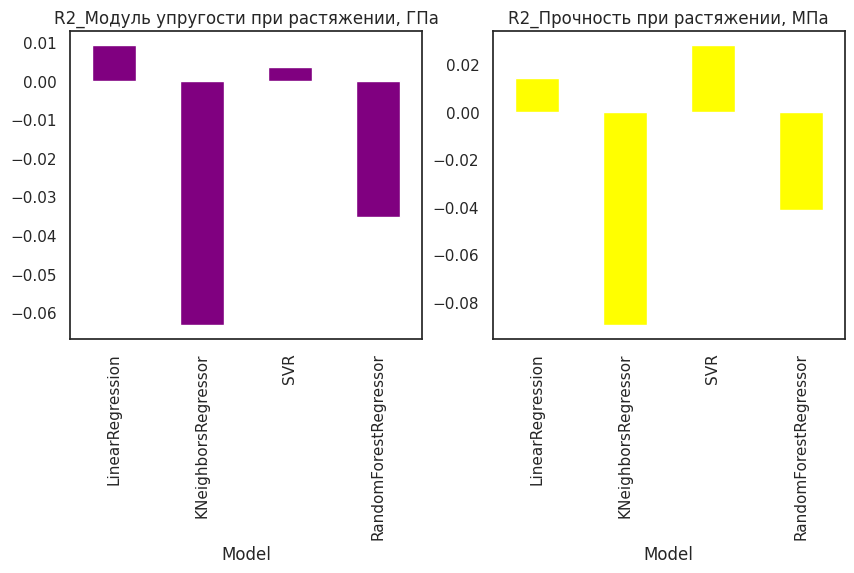

In [29]:
#построим графики и посмотрим какая модель показала лучший результат:
fig, axes = plt.subplots(ncols=2, figsize=(10,4))
TestModels.R2_Y1.plot(ax=axes[0], kind='bar', color='purple', title='R2_Модуль упругости при растяжении, ГПа')
TestModels.R2_Y2.plot(ax=axes[1], kind='bar', color='yellow', title='R2_Прочность при растяжении, МПа')

Вывод: из графиков видно, что ни одна из моделей не справилась с задачей.
При этом хуже всего показывает себя метод ближайших соседей. Метод линейной регрессии и метод опорных векторов дают прогнозы, приближённые к простому усреднению.

# Проверка точности предсказания модели LinearRegression с помощью функции cross_val_score

In [30]:
model = models[0]
model.fit(Xtrn, Ytrn)

LinearRegression()

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn import svm
scores = cross_val_score(model, Xtrn, Ytrn, cv=10)
print(f"При стандартном отклонении {round(scores.std(), 2)} точность получается {round(scores.mean(), 2)}")

При стандартном отклонении 0.04 точность получается -0.04


# Реализация среднеквадратичной ошибки (MSE) и средней абсолютной ошибки (MAE)

In [32]:
y_test = np.exp(Ytest)
y_pred = model.predict(Xtest)

In [33]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'mse: {round(mse, 2)}, mae: {round(mae, 2)}') #для линейной регрессии

mse: 1.47, mae: 1.17


# Нейронная сеть с рекомендацией соотношения "матрица-наполнитель"

In [34]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import BatchNormalization
from keras.layers import Dropout

print(tf.__version__)

2.12.0


In [35]:
df.shape

(999, 13)

In [36]:
train_dataset = df.sample(frac=0.7, random_state=0)
test_dataset = df.drop(train_dataset.index)

In [37]:
train_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Соотношение матрица-наполнитель,699.0,2.960359,0.931223,0.389403,2.339351,2.919678,3.580097,5.591742
"Плотность, кг/м3",699.0,1974.600891,71.765228,1784.482245,1922.558326,1977.562320,2020.961943,2192.738783
"модуль упругости, ГПа",699.0,738.555321,325.555512,2.436909,503.863788,738.736842,962.928659,1649.415706
"Количество отвердителя, м.%",699.0,109.992953,27.793899,29.956150,91.664671,109.701267,129.424657,192.851702
"Содержание эпоксидных групп,%_2",699.0,22.193856,2.432398,15.695894,20.471922,22.230744,23.961468,28.955094
"Температура вспышки, С_2",699.0,285.339115,40.139316,173.484920,258.813947,284.615385,312.487103,403.652861
"Поверхностная плотность, г/м2",699.0,475.611366,273.506365,1.668002,268.550814,451.313045,670.909268,1291.340115
"Модуль упругости при растяжении, ГПа",699.0,73.291436,3.087110,64.054061,71.229278,73.131268,75.296923,82.525773
"Прочность при растяжении, МПа",699.0,2474.633700,480.986482,1071.123751,2158.110366,2455.555556,2760.573255,3848.436732
"Потребление смолы, г/м2",699.0,215.540107,59.628399,41.048278,176.726517,215.511821,254.979901,378.756879


In [38]:
train_features = train_dataset.copy() #создаём тренировочные признаки
test_features = test_dataset.copy() #создаём тестовые признаки

train_labels = train_features.pop('Соотношение матрица-наполнитель') #создаём тренировочные выходы
test_labels = test_features.pop('Соотношение матрица-наполнитель') #создаём тестовые выходы

In [39]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
Соотношение матрица-наполнитель,2.960359,0.931223
"Плотность, кг/м3",1974.600891,71.765228
"модуль упругости, ГПа",738.555321,325.555512
"Количество отвердителя, м.%",109.992953,27.793899
"Содержание эпоксидных групп,%_2",22.193856,2.432398
"Температура вспышки, С_2",285.339115,40.139316
"Поверхностная плотность, г/м2",475.611366,273.506365
"Модуль упругости при растяжении, ГПа",73.291436,3.087110
"Прочность при растяжении, МПа",2474.633700,480.986482
"Потребление смолы, г/м2",215.540107,59.628399


In [40]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [41]:
normalizer.adapt(np.array(train_features))

In [42]:
print(normalizer.mean.numpy())

[[1974.6008     738.5553     109.992935    22.193857   285.3391
   475.6114      73.291435  2474.6338     215.54008     44.291843
     6.8709583   57.847954 ]]


In [43]:
first = np.array(train_features[:1])

with np.printoptions(precision=2):
    print('First example:', first)
    print()
    print('Normalized:', normalizer(first).numpy())

First example: [[1886.69  700.11  120.82   19.89  327.35  700.36   77.25 3041.47  327.89
    90.      8.07   54.3 ]]

Normalized: [[-1.23 -0.12  0.39 -0.95  1.05  0.82  1.28  1.18  1.89  1.02  0.47 -0.3 ]]


# Построение линейной модели от потребления смолы (так как с этим признаком наибольший коэффициент корреляции)

In [44]:
potrsmoly = np.array(train_features['Потребление смолы, г/м2'])
potrsmoly_normalizer = layers.Normalization(input_shape=[1,], axis=None)
potrsmoly_normalizer.adapt(potrsmoly)

In [45]:
potrsmoly_model = tf.keras.Sequential([
    potrsmoly_normalizer,
    layers.Dense(units=1)
])

potrsmoly_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [46]:
potrsmoly_model.predict(potrsmoly[:10])

1/1 [==============================] - 0s 113ms/step


array([[ 0.7550247 ],
       [ 0.08715347],
       [ 0.10175335],
       [-0.96107376],
       [-0.19089301],
       [-0.34390935],
       [-0.44174612],
       [-0.17135365],
       [-0.15691322],
       [-0.55215424]], dtype=float32)

In [47]:
train_labels.values[:10]

array([2.78113974, 3.71167554, 1.62694581, 3.16574099, 3.58242628,
       2.50501788, 1.27327252, 2.08608583, 2.91614962, 1.1657435 ])

In [48]:
potrsmoly_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [ ]:
%%time
history = potrsmoly_model.fit(
    train_features['Потребление смолы, г/м2'],
    train_labels,
    epochs=100,
    verbose=1,
    validation_split = 0.3)

Epoch 1/100
16/16 [==============================] - 1s 15ms/step - loss: 2.2511 - val_loss: 1.4904
Epoch 2/100
16/16 [==============================] - 0s 5ms/step - loss: 0.9774 - val_loss: 0.7503
Epoch 3/100
16/16 [==============================] - 0s 5ms/step - loss: 0.7908 - val_loss: 0.7540
Epoch 4/100
16/16 [==============================] - 0s 4ms/step - loss: 0.7574 - val_loss: 0.7499
Epoch 5/100
16/16 [==============================] - 0s 5ms/step - loss: 0.7494 - val_loss: 0.7539
Epoch 6/100
16/16 [==============================] - 0s 6ms/step - loss: 0.7489 - val_loss: 0.7425
Epoch 7/100
16/16 [==============================] - 0s 5ms/step - loss: 0.7557 - val_loss: 0.7441
Epoch 8/100
16/16 [==============================] - 0s 5ms/step - loss: 0.7500 - val_loss: 0.7435
Epoch 9/100
16/16 [==============================] - 0s 5ms/step - loss: 0.7495 - val_loss: 0.7438
Epoch 10/100
16/16 [==============================] - 0s 4ms/step - loss: 0.7496 - val_loss: 0.7432
Epoch 11

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

In [ ]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 2.5])
    plt.xlabel('Epoch')
    plt.ylabel('Error [Соотношение матрица-наполнитель]')
    plt.legend()
    plt.grid(True)

In [ ]:
plt.figure(figsize=(12,10))
plot_loss(history)

In [ ]:
test_results = {}

test_results['potrsmoly_model'] = potrsmoly_model.evaluate(
    test_features['Потребление смолы, г/м2'],
    test_labels, verbose=0)

In [ ]:
test_results

In [ ]:
x = tf.linspace(0.0, 400, 451)
y = potrsmoly_model.predict(x)

In [ ]:
def plot_potrsmoly(x, y):
    plt.scatter(train_features['Потребление смолы, г/м2'], train_labels, label='Data')
    plt.plot(x, y, color='k', label='Predictions')
    plt.xlabel('Потребление смолы, г/м2')
    plt.ylabel('Соотношение матрица-наполнитель')
    plt.legend()

In [ ]:
plt.figure(figsize=(8,5))
plot_potrsmoly(x, y)

# Построение линейной модели

In [ ]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [ ]:
linear_model.predict(train_features[:10])

In [ ]:
linear_model.layers[1].kernel

In [ ]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [ ]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    verbose=1,
    validation_split = 0.3)

In [ ]:
plt.figure(figsize=(12,10))
plot_loss(history)

In [ ]:
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

# Построение многослойного персептрона

In [ ]:
def build_and_compile_model(norm):
    model = keras.Sequential([
      norm,
      layers.Dense(32, activation='tanh'),
      layers.BatchNormalization(trainable = False),
      Dropout(0.7),
      layers.Dense(1),
    ])

    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
    return model

In [ ]:
dnn_potrsmoly_model = build_and_compile_model(potrsmoly_normalizer)
dnn_potrsmoly_model.summary()

In [67]:
%%time
history = dnn_potrsmoly_model.fit(
    train_features['Потребление смолы, г/м2'],
    train_labels,
    validation_split=0.3,
    verbose=0, epochs=100)

CPU times: user 7.24 s, sys: 332 ms, total: 7.58 s
Wall time: 11.1 s


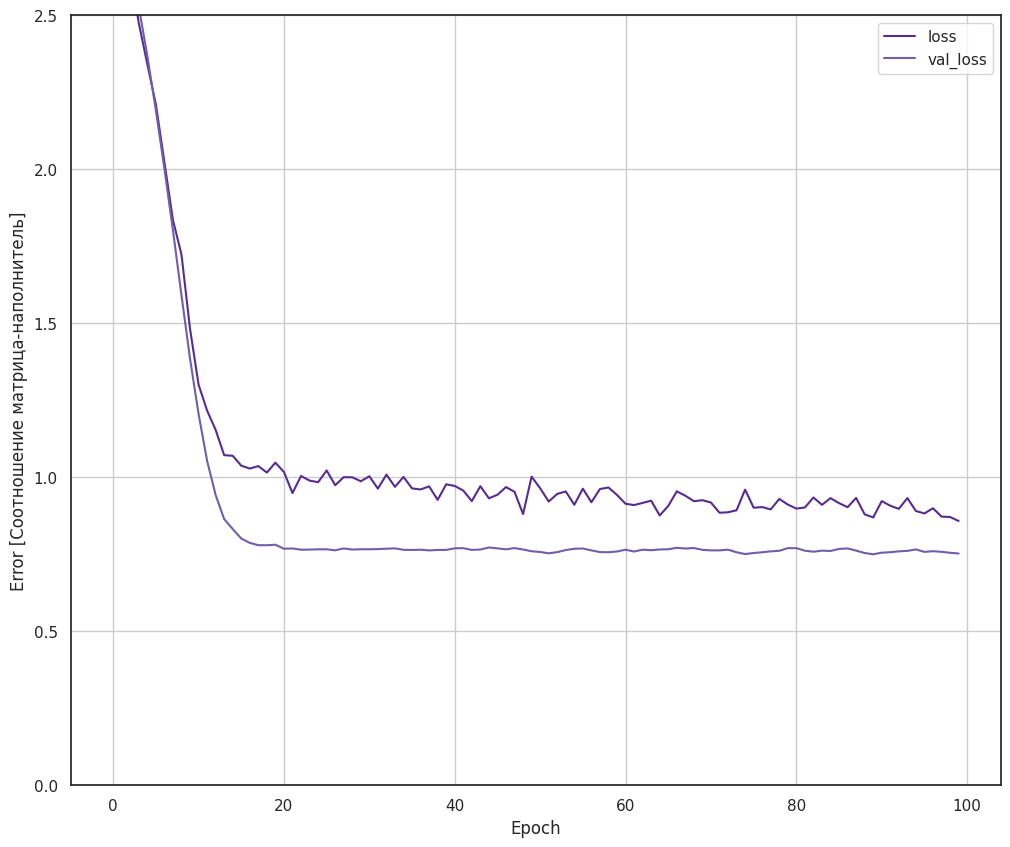

In [68]:
plt.figure(figsize=(12,10))
plot_loss(history)

15/15 [==============================] - 0s 2ms/step


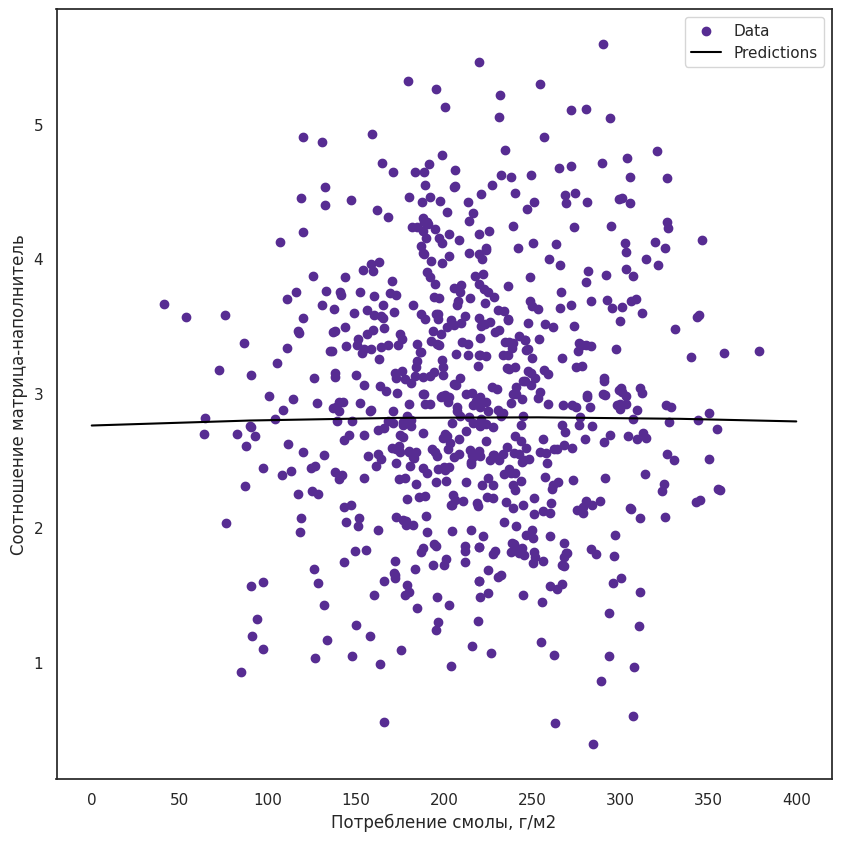

In [69]:
x = tf.linspace(0.0, 400, 451)
y = dnn_potrsmoly_model.predict(x)
plot_potrsmoly(x, y)

In [70]:
test_results['dnn_potrsmoly_model'] = dnn_potrsmoly_model.evaluate(
    test_features['Потребление смолы, г/м2'], test_labels,
    verbose=0)

In [71]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 12)               25        
 n)                                                              
                                                                 
 dense_4 (Dense)             (None, 32)                416       
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 602
Trainable params: 449
Non-trainable 

In [72]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.3,
    verbose=0, epochs=100)

CPU times: user 7.63 s, sys: 332 ms, total: 7.96 s
Wall time: 11.3 s


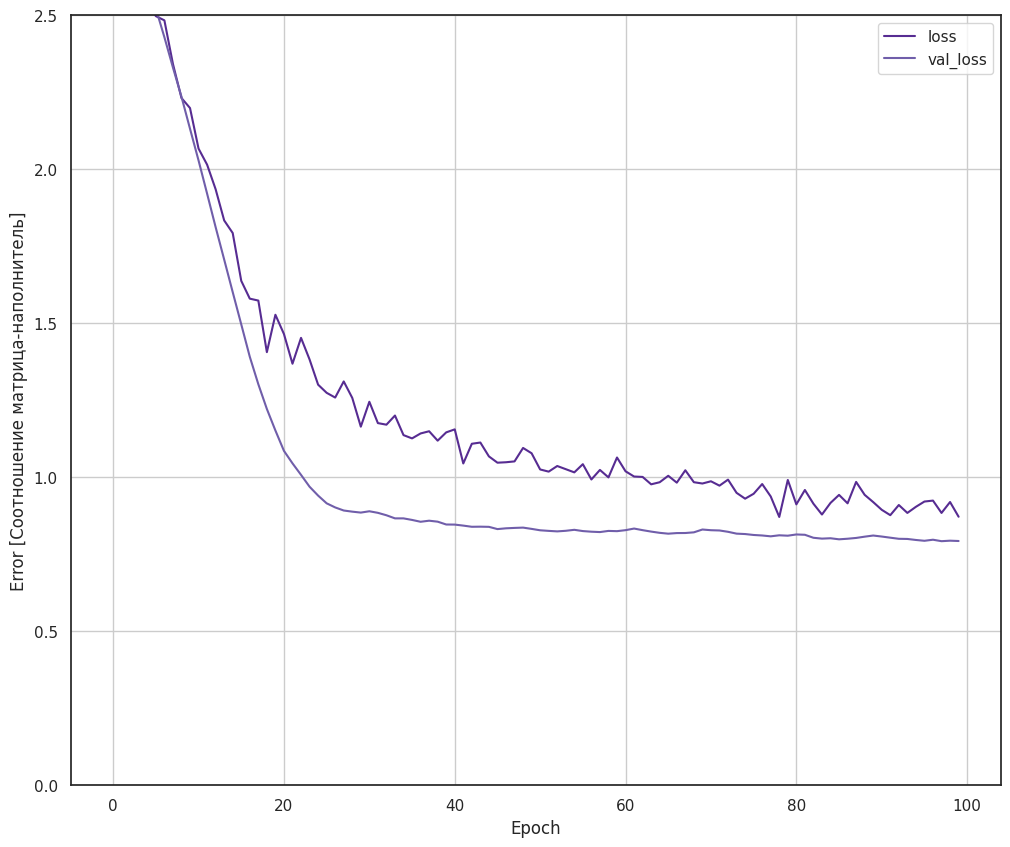

In [73]:
plt.figure(figsize=(12,10))
plot_loss(history)

In [74]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

In [75]:
pd.DataFrame(test_results, index=['Mean absolute error [Соотношение матрица-наполнитель]']).T

,Mean absolute error [Соотношение матрица-наполнитель]
potrsmoly_model,0.677009
linear_model,0.749785
dnn_potrsmoly_model,0.682067
dnn_model,0.707345


10/10 [==============================] - 0s 3ms/step


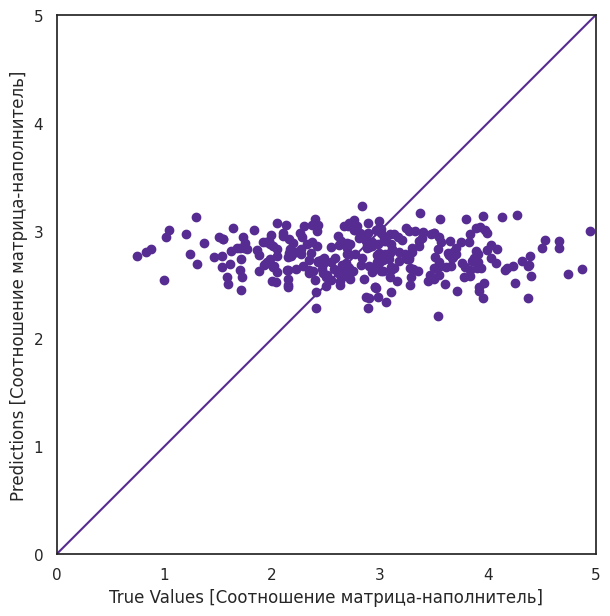

In [76]:
plt.figure(figsize=(7,7))
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Соотношение матрица-наполнитель]')
plt.ylabel('Predictions [Соотношение матрица-наполнитель]')
lims = [0,5]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

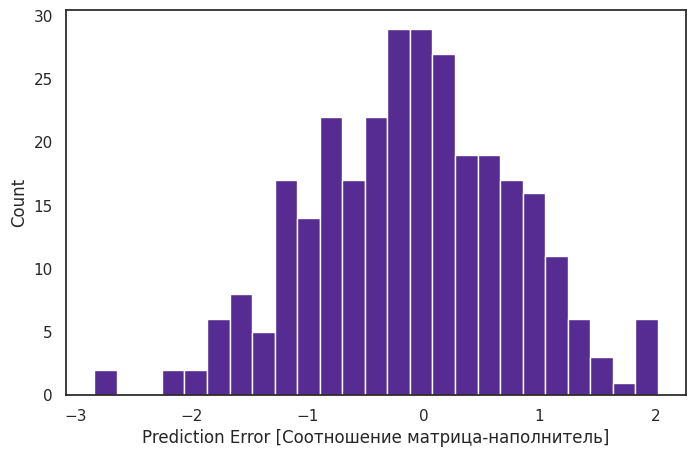

In [77]:
error = test_predictions - test_labels
plt.figure(figsize=(8, 5))
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [Соотношение матрица-наполнитель]')
_ = plt.ylabel('Count')

# Сохраняем модель dnn_model

In [83]:
import pickle
from flask import Flask, request, render_template
pickle.dump(dnn_model, open('dnn_model.pkl', 'wb'))

In [ ]:
model_load = pickle.load(open('dnn_model.pkl', 'rb'))

ValueError: ignored

In [78]:
tf.keras.models.save_model( dnn_model, filepath='/content/gdrive/MyDrive/Colab Notebooks/MyKOMPOSIT/dnn_save')

In [79]:
model_load = tf.keras.models.load_model('/content/gdrive/MyDrive/Colab Notebooks/MyKOMPOSIT/dnn_save')

In [80]:
test_results['model_load'] = model_load.evaluate(test_features, test_labels, verbose=0)
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T #проверяем, что результаты модели ddn_model и model_load совпадают

,Mean absolute error [MPG]
potrsmoly_model,0.677009
linear_model,0.749785
dnn_potrsmoly_model,0.682067
dnn_model,0.707345
model_load,0.707345


# Приложение Flask

In [81]:
!pip install flask-ngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [82]:
from flask_ngrok import run_with_ngrok
from flask import Flask

In [83]:
app = Flask(__name__)